In [17]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [19]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255.
x_test/=255.

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_train.shape)
print(y_train[0:9,:])

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(50000, 1)
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]]


In [22]:
#one hot:转化成向量形式
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [23]:
#定义CNN模型
model = Sequential()

In [24]:
#定义第一层卷积 32个3*3过滤器
model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3),activation='relu'))

In [25]:
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [26]:
#第三层
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
#第4层
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.25))

In [27]:
#第五层
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))

In [28]:
#softmax
model.add(Dense(10,activation='softmax'))

In [33]:
#编译模式
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [34]:
model.summary

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x0000028F57ED2898>>

In [36]:
history=model.fit(
    x_train,
    y_train,
    batch_size = 64,
    epochs =3,
    validation_data=(x_test,y_test),
    shuffle = True
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 366s 7ms/step - loss: 1.1447 - acc: 0.5925 - val_loss: 1.0174 - val_acc: 0.6437
Epoch 2/3
50000/50000 [==============================] - 354s 7ms/step - loss: 0.9896 - acc: 0.6502 - val_loss: 0.8982 - val_acc: 0.6836
Epoch 3/3
50000/50000 [==============================] - 359s 7ms/step - loss: 0.8942 - acc: 0.6861 - val_loss: 0.8213 - val_acc: 0.7110


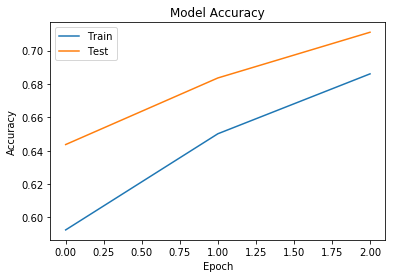

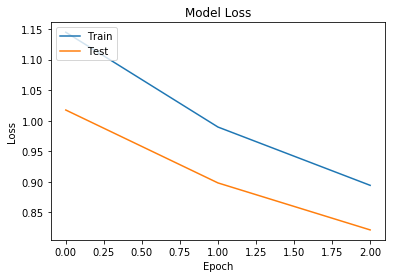

In [37]:
#绘图
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.savefig('accuracy.png')
plt.show()

#绘图
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.savefig('loss.png')
plt.show()

In [40]:
#保存模型
model_structure = model.to_json()
f = Path('model_structure.json')
f.write_text(model_structure)

NameError: name 'model_structure' is not defined

In [ ]:
#保存训练好的权重
model.save_weights('model_weights.h5')